<center>
<img src="logo.png" height="900"> 
</center>


#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [6]:
#!pip install plotly_express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [57]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
#import plotly_express
import pandas as pd
import datetime
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [8]:

df = pd.read_csv('walmart.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [9]:
ans1 = len(df)

In [10]:
ans1

418239

In [11]:
ans1 = 418239

In [12]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 6

# your code here
empty_passes = 100*df.isna().sum()/df.isna().count()
print(empty_passes)
ans2 = empty_passes[empty_passes[0]>60]
empty_passes = pd.DataFrame (empty_passes)


Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64


In [14]:
n = math.floor(0.1*len(df))
print(n)
tmp_df = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sample(n)
tmp_df

41823


,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
137353,NaN,NaN,NaN,NaN,NaN
211716,18261.32,142.40,19.79,3041.13,4316.44
418085,8429.61,148.60,76.15,1465.54,7180.97
296137,NaN,NaN,NaN,NaN,NaN
382982,40493.45,83.46,44.56,23826.20,3666.08
...,...,...,...,...,...
85273,4731.10,2959.36,NaN,129.27,3416.48
359987,NaN,NaN,NaN,NaN,NaN
175537,6538.92,113.06,0.28,3817.92,959.97
30359,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.heatmap(tmp_df, annot=True)

In [15]:
ans2 = 5

In [16]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [190]:
df.Date.unique().max()

numpy.datetime64('2012-10-19T00:00:00.000000000')

In [51]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 555
ans3 = df.Store.unique().size
ans4 = df.Dept.nunique()
ans5 = (df.Date.unique().max()-df.Date.unique().min())/np.timedelta64(1, 'D')

# your code here

In [55]:
ans3 = 45
ans4 = #81
ans5 = 988

In [52]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart. Обязательно подпишите у графика оси. В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.

Насколько хорошо идут дела у магазинов? Есть ли в динамике продаж какие-то интересные особенности? Как думаете, с чем они связаны? 

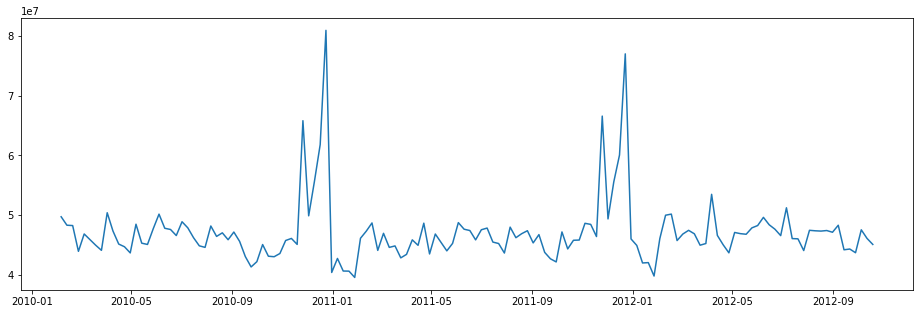

In [178]:
tmp_data = df[['Date', 'Weekly_Sales']].copy()
tmp_data = tmp_data.groupby('Date').sum()
plt.figure(figsize=(16, 5))
plt.plot(tmp_data)

In [179]:
tmp_data.Weekly_Sales.sort_values(ascending=False)

Date
2010-12-24    80931415.60
2011-12-23    76997324.41
2011-11-25    66589459.29
2010-11-26    65821003.24
2010-12-17    61820531.01
                 ...     
2011-01-14    40673678.04
2011-01-21    40654648.03
2010-12-31    40432519.00
2012-01-27    39834741.57
2011-01-28    39599852.99
Name: Weekly_Sales, Length: 142, dtype: float64

In [180]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: строка, пример: '2010-12-04'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
ans6 = '2010-12-24'

# your code here


In [181]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.

Обратите отдельное внимание на знак корреляции между безработицей (Unemployment) и индексом потребительских цен (CPI). Про него в конце тетрадки вас ждёт отдельная история.

In [125]:
tmp_df = df.copy()
tmp_df = tmp_df.drop(columns=['Store', 'Dept','Type', 'IsHoliday', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
tmp_df

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106
2,2010-02-19,41595.55,39.93,2.514,211.289143,8.106
3,2010-02-26,19403.54,46.63,2.561,211.319643,8.106
4,2010-03-05,21827.90,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
418234,2012-09-21,467.30,65.32,4.038,191.856704,8.684
418235,2012-09-28,508.37,64.88,3.997,192.013558,8.684
418236,2012-10-05,628.10,64.89,3.985,192.170412,8.667
418237,2012-10-12,1061.02,54.47,4.000,192.327265,8.667


In [148]:
tmp_df.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.002197,0.000385,-0.020791,-0.026114
Temperature,-0.002197,1.000000,0.144837,0.181292,0.097301
Fuel_Price,0.000385,0.144837,1.000000,-0.163226,-0.032461
CPI,-0.020791,0.181292,-0.163226,1.000000,-0.299723
Unemployment,-0.026114,0.097301,-0.032461,-0.299723,1.000000


In [146]:
matrix = tmp_df.corr()
t = abs(matrix.unstack()).sort_values()
t = t[t!=1]
t.max()

Fuel_Price    Weekly_Sales    0.000385
Weekly_Sales  Fuel_Price      0.000385
              Temperature     0.002197
Temperature   Weekly_Sales    0.002197
Weekly_Sales  CPI             0.020791
CPI           Weekly_Sales    0.020791
Unemployment  Weekly_Sales    0.026114
Weekly_Sales  Unemployment    0.026114
Fuel_Price    Unemployment    0.032461
Unemployment  Fuel_Price      0.032461
Temperature   Unemployment    0.097301
Unemployment  Temperature     0.097301
Temperature   Fuel_Price      0.144837
Fuel_Price    Temperature     0.144837
              CPI             0.163226
CPI           Fuel_Price      0.163226
Temperature   CPI             0.181292
CPI           Temperature     0.181292
              Unemployment    0.299723
Unemployment  CPI             0.299723
dtype: float64

In [149]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа действительное число, пример: 0.22222
# Не забудьте взять модуль от матрицы корреляций! 
ans7 = t.max()

# your code here
t.max()

0.2997230218737895

Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.

- Как думате, между какими переменными в данных присутствует нелинейная взаимосвязь? 
- Как думаете, какое распределение у цен? Как бы вы его нормализовали, если бы вам это понадобилось? 

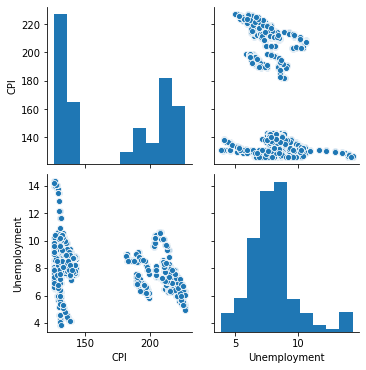

In [145]:
sns.pairplot(tmp_df[['CPI', 'Unemployment']].sample(int(0.1*len(tmp_df))))

In [182]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
ans7 = t.max()

In [ ]:
ans7 = 0.299723

In [160]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике. Правда ли, что пик продаж у них происходит примерно в одно время? Как думаете, с чем связан этот пик? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
print('')

# your code here


__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

print('')

# your code here


# Бонусная история про анализ данных и ошибки, которые мы при нём совершаем

Помните, когда мы смотрели на корреляционную матрицу, мы увидели, что между безработицей и инфляцией есть отрицательная взаимосвязь: чем больше безработица, тем ниже инфляция. В экономике эта взаимосвязь называется кривой Филиппса. И за ней кроется очень интересная история из целой плеяды ошибок. Давайте попробуем научиться на чужих ошибках чему-нибудь новому. 

В $1958$ году была опубликована статья экономиста Филиппса, в которой он обнаружил достаточно чёткую отрицательную связь между инфляцией и безработицей в Англии за прошедшие $70$ лет. Проверка этой работы на американских данных подтвердила наличие взаимосвязи. Так родилась знаменитая кривая Филиппса. Её стали интерпретировать как некую возможность выбора между высокой инфляцией и высокой безработицей. Нужно сократить безработицу? Давайте напечатаем денег и разгоним инфляцию!

Любому политику безработица кажется более значимой социальной проблемой, нежели инфляция, и он хочет её победить любыми доступными средствами. Самым популярным средством по борьбе с безработицей является агрессивная монетарная политика, которая состоит в расширении денежной массы. Грубо говоря, просто печатают ещё денег. Именно это и было сделано президентом США Ричардом Никсоном в начале $1970$-х гг. в ходе погони за низкой безработицей и высокой инфляцией.

К сожалению, план Никсона удался только наполовину, он добился высокой инфляции, но сбить безработицу не смог. В краткосрочном периоде она действительно упала, но через некоторое время вернулась назад. Кривая Филиппса в этот период времени исчезла из данных. Никакой взаимосвязи между безработицей и инфляцией больше не прослеживалось.

В течение $70$-х все Западные страны поэкспериментировали с кривой Филиппса. В конечном итоге, $1980$-е годы были потрачены на обуздание разогнанной инфляции. Победа над инфляцией обошлась довольно дорого. Например, Пол Волкер, возглавлявший в этот период времени ФРС США, взвинтил процентную ставку до $19\%$. Высокие ставки отправили экономику в рецессию. Такая жёсткая принципиальная политика ФРС позволила сбить инфляционные ожидания.

__Какова мораль этой истории?__ Политики увидели в данных закономерность, но начав бороться с безработицей, печатая деньги, немного перепутали причину и следствие. На самом деле никакой чёткой отрицательной зависимости между инфляцией и безработицей в природе не существует. Её наличие в данных является следствием сложного взаимодействия между экономическими агентами. Политики пытавшись воздействовать на следствие, а не на причину, из-за этого у них не получилось достичь своих целей.

Не путайте причину и следствие, когда смотрите в данные и помните, что работа с ними малость сложнее, чем кажется на первый взгляд. __Корреляция не обозначает причинности.__ 